In [29]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from PIL import Image
import os, glob
import numpy as np

In [30]:
from keras.datasets import cifar10
import keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [31]:
root_dir = 'C:/data/'

In [32]:
categories = ['bear', 'glacier']
nb_classes = len(categories)

In [33]:
image_width = 64
image_height = 64

In [34]:
import io
import urllib.request
from PIL import Image

In [37]:
X = []
Y = []

for idx, category in enumerate(categories):
#     print(idx, category)
    image_dir = root_dir + category
    files = glob.glob((image_dir + "/" + '*.jpg')) + glob.glob((image_dir + "/" + '*.jpeg')) + glob.glob((image_dir + "/" + '*.png')) +  glob.glob((image_dir + "/" + '*.gif'))
    
    for i,f in enumerate(files):
        img = Image.open(f)
        img = img.convert("RGB")
        img = img.resize((image_width, image_height))
        data = np.asarray(img)
        X.append(data)
        Y.append(idx)
        
X = np.array(X)
Y = np.array(Y)
print(X.shape, Y.shape)

C:\Users\PC\Anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:804: UserWarning: Corrupt EXIF data.  Expecting to read 2 bytes but only got 0. 
  warnings.warn(str(msg))


(1038, 64, 64, 3) (1038,)


In [38]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=144, stratify=Y, test_size = 0.5)

In [39]:
import sys, os
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Activation
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Dense
from keras.utils import np_utils
import numpy as np

In [40]:
x_train = x_train.astype("float") / 256
x_test = x_test.astype("float") / 256
y_train = np_utils.to_categorical(y_train, nb_classes)
y_test = np_utils.to_categorical(y_test, nb_classes)

In [41]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(519, 64, 64, 3)
(519, 64, 64, 3)
(519, 2)
(519, 2)


In [42]:
label_names=['bear', 'glacier']

In [43]:
X = tf.placeholder(tf.float32, [None, 64, 64, 3])
Y = tf.placeholder(tf.float32, [None, 2])

In [44]:
W1 = tf.Variable(tf.random_normal([3,3,3,32], stddev=0.01))
L1 = tf.nn.conv2d(X, W1, strides=[1,1,1,1], padding='SAME')
L1 = tf.nn.relu(L1)
L1 = tf.nn.max_pool(L1, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
print(L1)

Tensor("MaxPool_3:0", shape=(?, 32, 32, 32), dtype=float32)


In [45]:
W2 = tf.Variable(tf.random_normal([3,3,32,64], stddev=0.01))
L2 = tf.nn.conv2d(L1, W2, strides=[1,1,1,1], padding='SAME')
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
print(L2)

Tensor("MaxPool_4:0", shape=(?, 16, 16, 64), dtype=float32)


In [46]:
W3 = tf.Variable(tf.random_normal([3,3,64,128], stddev=0.01))
L3 = tf.nn.conv2d(L2, W3, strides=[1,1,1,1], padding='SAME')
L3 = tf.nn.relu(L3)
L3 = tf.nn.max_pool(L3, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
print(L3)

Tensor("MaxPool_5:0", shape=(?, 8, 8, 128), dtype=float32)


In [47]:
W4 = tf.Variable(tf.random_normal([8*8*128, 256], stddev=0.01))
L4 = tf.reshape(L3, [-1,8*8*128])
L4 = tf.matmul(L4, W4)
L4 = tf.nn.relu(L4) 
print(L4)

Tensor("Relu_7:0", shape=(?, 256), dtype=float32)


In [48]:
W5 = tf.Variable(tf.random_normal([256,2], stddev=0.01))
model=tf.matmul(L4, W5)
model

<tf.Tensor 'MatMul_3:0' shape=(?, 2) dtype=float32>

In [49]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=model, labels=Y))
optimizer = tf.train.AdamOptimizer(0.0001).minimize(cost)

In [50]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [56]:
batch_size = 20
total_batch = int(len(x_train)/batch_size)
print(total_batch)
epochs = 280

25


In [52]:
def next_batch(start, num, data, labels):
  data_X = data[start:start+num]
  data_y = labels[start:start+num]

  return np.asarray(data_X), np.asarray(data_y)

In [53]:
print(x_train.shape, y_train.shape)
batch_x, batch_y = next_batch(0, 10, x_train, y_train)
print(batch_x.shape, batch_y.shape)

(519, 64, 64, 3) (519, 2)
(10, 64, 64, 3) (10, 2)


In [57]:
print('전체 입력 데이터 : {}'.format(x_train.shape))
print('전체 출력 데이터 : {}\n'.format(y_train.shape))

for epoch in range(epochs):
  total_cost = 0

  for i in range(total_batch):
    batch_xs, batch_ys = next_batch(batch_size*i, batch_size, x_train, y_train)

    _, cost_val = sess.run([optimizer, cost], feed_dict={X: batch_xs, Y: batch_ys})
    total_cost += cost_val

    if (i==0 or i==total_batch-1):
      print('data_step = {}, cost = {:.3f}'.format(i, cost_val))
  
  print('epoch: {} total.cost = {:.3f}'.format(epoch+1, total_cost))
  print('-------------------------------------------------------')

전체 입력 데이터 : (519, 64, 64, 3)
전체 출력 데이터 : (519, 2)

data_step = 0, cost = 0.002
data_step = 24, cost = 0.071
epoch: 1 total.cost = 0.374
-------------------------------------------------------
data_step = 0, cost = 0.013
data_step = 24, cost = 0.013
epoch: 2 total.cost = 0.359
-------------------------------------------------------
data_step = 0, cost = 0.002
data_step = 24, cost = 0.032
epoch: 3 total.cost = 0.336
-------------------------------------------------------
data_step = 0, cost = 0.009
data_step = 24, cost = 0.020
epoch: 4 total.cost = 0.299
-------------------------------------------------------
data_step = 0, cost = 0.015
data_step = 24, cost = 0.016
epoch: 5 total.cost = 0.299
-------------------------------------------------------
data_step = 0, cost = 0.012
data_step = 24, cost = 0.006
epoch: 6 total.cost = 0.292
-------------------------------------------------------
data_step = 0, cost = 0.004
data_step = 24, cost = 0.006
epoch: 7 total.cost = 0.315
------------------

In [97]:
is_correct = tf.equal(tf.argmax(model, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

print('train  : ', sess.run(accuracy, feed_dict = {X:x_train, Y:y_train}))
print('test   : ', sess.run(accuracy, feed_dict = {X:x_test, Y:y_test}))

train  :  0.96917146
test   :  0.76685935


## 실제 검색 이미지를 이용한 예측

test 0.8
train 정확도 :  0.9558824
test 정확도 :  0.653211


0.3
train 정확도 :  0.9453781
test 정확도 :  0.6780488

 5:5
train 정확도 :  0.96917146
test 정확도 :  0.76685935

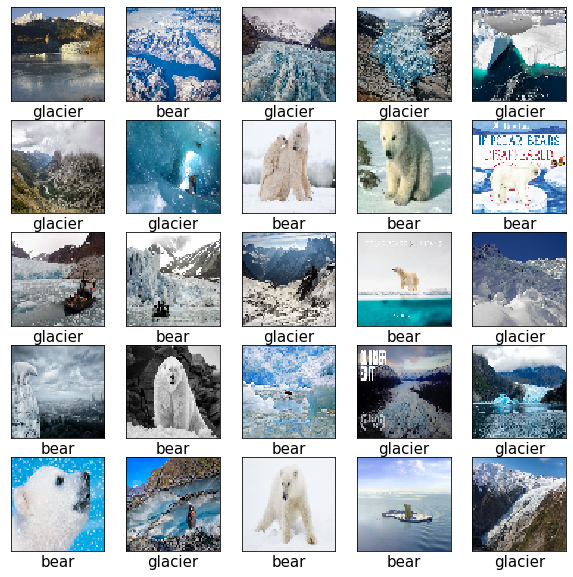

In [95]:
plt.rcParams["font.size"] = 15

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(pred_labels[i])
plt.show()

In [91]:
val = y_train[1]
val[[0]]

array([1.], dtype=float32)

In [92]:
pred_labels = []

for i in range(25):
    val = y_train[i]
    if val[[0]] ==0 : pred_labels.append("glacier")
    elif val[[0]] ==1 : pred_labels.append("bear")

In [100]:
test = 'C:/Users/PC/Documents/카카오톡 받은 파일/새 폴더'

'C:/Users/PC/Documents/카카오톡 받은 파일/새 폴더'